# Alternative methods for prime factorization using classical resources
### The Rock 'n' Roll Institute of Physics and Fine Arts

Factorization is an old well-known problem, which at some extent, is the foundation of modern crypto algorithms, like the RSA protocol.  It is interesting to see that multiplication is an easy task, whereaas finding two factor such that their product equals a given number, is not easy.  Indeed, the best classical algorithm takes exponential time to solve the problem.  In this notes, we will show our advances in the topic as well as our new understanding. 

An alternative algorithm was proposed by Peter Shor in 1994, where the principles of quantum mechanics leads to factorization of a given number in polynomial time.  The algorithm is based in computing the function $f(x)=a^x\mod N$, where $N=p\cdot q$ is the big number that we want to factorize, $x\in \{0,\ldots,N-1\}$ and $(p,q)$ are the prime factors.  The algorithm picks a random number $a\in \{2,\ldots,N-1\}$ then finds the period $r$ of such a function. Finally this method computes $\gcd(a^{r/2}\pm 1,N)$.  The output of the last expression will either lead to trivial factors $\{1,N\}$ or to the non--trivial solutions $\{p, q\}$.

Motivated by Shor's algorithm, we asked ourselves: what are the $a$'s and $x$'s evaluated in $f$ such that the function

$$ g(a,r;N)=\gcd[f(a,r)\pm 1, N],$$
throws non--trivial solutions?


In [1]:
# we call some necessary packages
using Primes
using Plots
using LinearAlgebra # julia 1
# plotlyjs()
gr()

ArgumentError: ArgumentError: Package Primes not found in current path:
- Run `import Pkg; Pkg.add("Primes")` to install the Primes package.


First, we define a function $\tilde G(a,r,;N)$ that receives $(a,r)$ and returns 1 if the pair hits a non--trivial factor, or 0 otherwise.

In [12]:
function customGCD(a,r,N,k=1)
    f=powermod(a,k*r,N);
    g1=gcd(f+1,N);
    g2=gcd(f-1,N);
    gf=max(g1,g2);
    g=gf*(1<gf<N); # this is the returned value!
end

customGCD (generic function with 2 methods)

The following code plots the value $1$, for the corresponding $(a,r)$ that gives non-trivial factors, or 0 otherwise.

In [19]:
# function to show Gtilde 
function FactorMap(N,k=1)
    as=2:N-1;  # vector for a
    rs=2:N-1;  # vector for r

    # function f(a,r)
    GGf=[customGCD(a,r,N,k) for a in as, r in rs]
    GGi=1 .* (1 .< GGf .< N);

    # plot
    heatmap(as,rs,GGi,aspect_ratio=1)
    plot!(xlabel="a", ylabel="r")
end

FactorMap (generic function with 2 methods)

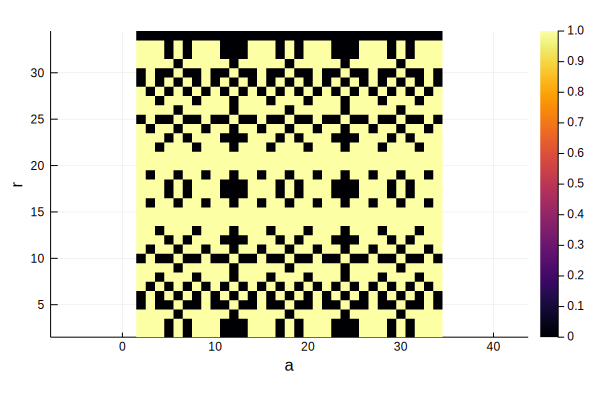

In [20]:
N=35
FactorMap(N)

Note that if we increase the size of $N$, the density of "hits" decreases, therefore one can think on a scheme to increase the the number of solutions that span over the plane $(a,r)$.  This idea will be explained in detail later. 

## "Phenomenology" approach

We tried to change the function $f$ to the following

$$f(x)=\left(x+\sqrt{N}\right)^{x+\sqrt{N}} \mod N.$$

Then we computed 

$$g(x;N)=\gcd[f(x)\pm 1, N].$$


In order to get an idea of the values of $x$ that hit non--trivial factors, we computed the smallest $x$ for different $N$.  Following is the code to study that behaviour.

In [15]:
"""
This function computes the a-th solution of the factorization problem for our function f(x)
"""
function FactAnalysis2(N,a)

maxN=size(N,1);
y=zeros(Int64,maxN);
alpha=10^5;
beta=10^6;
    
    for x=1:maxN,
        limN=N[x];
        ath=0;
        for i=1:limN;
#             fx=i+div(isqrt(limN+i),i)+div(isqrt(0),5)
            fx=i+isqrt(limN)
            G=customGCD(fx, fx, limN);
#             G=customGCD(i+isqrt(3beta)+div(isqrt(limN),i), i+isqrt(3beta)+div(isqrt(limN),i), limN);
#             G=customGCD(i+isqrt(limN), i+isqrt(limN),  limN);
            if G!=0
                ath=ath+1;
            end
            
            if ath==a
                y[x]=i;
#               println(y[x])
                break;
            end
            
        end
    end
return y;
end

FactAnalysis2

To test this idea, we generated a list of prime factors, and subsequently we multiplied them each other, such that we created an array of all possible $N$ numbers made of prime factors in a defined interval.

In [21]:
# boundaries for the prime factors
LL=100;
MM=999;

# generation of prime numbers
prs=primes(LL,MM);
PR=prs*prs';
tPR=triu(PR);
N=sort(tPR[tPR.!=0]);
M=N[1:1:end]

# find the minimum x that leads to a non--trivial factor for many Ns.
y=FactAnalysis2(M,1);

We want to be sure that all factors have a solution, therefore

In [22]:
MissingSolution=sum(1*(y.==0).*(true));
size(y,1), MissingSolution, size(N,1)

(10296, 0, 10296)

Finally, we visualize the data

In [23]:
scatter(N,y,markersize=1)
plot!(xlabel="N", ylabel="x")

One can observe that there are few boundaries according to the following relations
\begin{align}
h_9(N) &= \sqrt{N/9},\\
h_{20}(N) &= \sqrt{N/20},\\
m(N) &= -\frac{\frac{2}{3} \sqrt{\frac{2}{3}N_m - 2}}{N_m} N +\frac{2}{3}\sqrt{\frac{2}{3}N_m} - 1,
\end{align}

In [41]:
# lines coming from higher Ns
hSlope(Nm)=-((2/3)*sqrt((2/3)*Nm)-2)/Nm;
hCross(Nm)=-1+(2/3)*sqrt((2/3)*Nm);
h(teoN,Nm)=hSlope(Nm)*teoN + hCross(Nm);

# square-root from the upper part
hsquare20(teoN)=sqrt(teoN/20) + 1;
hsquare9(teoN)=sqrt(teoN/9) + 1;

nMin=LL^2;
nMax=MM^2;
steps=10;
teoN=nMin:steps:nMax;
tmin=1:steps:nMin;
tmax=1:steps:nMax;

# plot(teoN,hsquare20.(teoN-nMin))
# plot!(teoN,hsquare9.(teoN-nMin))
plot!(teoN,h.(teoN,nMax))
# scatter!(N,y,markersize=1)
# plot!(xlabel="N", ylabel="x")

MethodError: MethodError: no method matching -(::StepRange{Int64,Int64}, ::Int64)
Closest candidates are:
  -(!Matched::Complex{Bool}, ::Real) at complex.jl:299
  -(!Matched::Missing, ::Number) at missing.jl:94
  -(!Matched::Base.CoreLogging.LogLevel, ::Integer) at logging.jl:107
  ...

The question now is wether we can use the information of the boundary lines to factorize a number within the enclosed region.

## Ring period approach

Consider the function 

$$ f(a,r;k) = a^{kr} \mod N,$$

where $k$ is some integer.  Then we evaluate the function 

$$ g(a,r;N,k)=\gcd[f(a,r;k)\pm 1, N],$$

such that the chosen $k$ will increase the number of points $(a,r)$ that lead to non--trivial factors.  (CHECK PROOF)

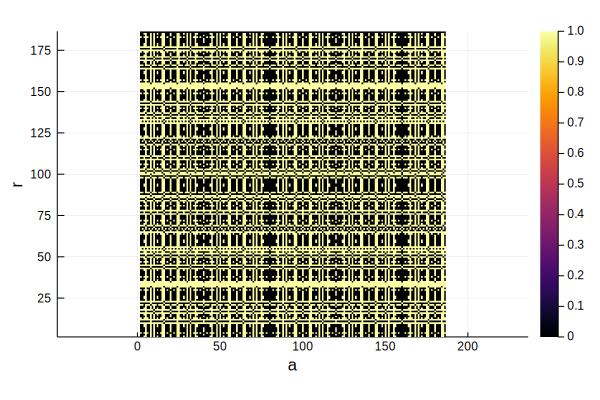

In [28]:
N=11*17;
k=1;
FactorMap(N,k)

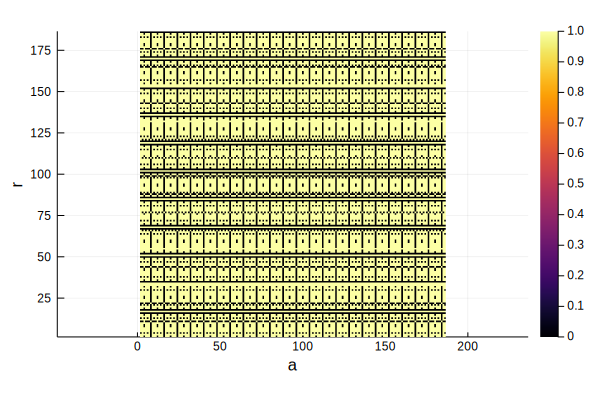

In [29]:
k=10
FactorMap(N,k)

Here we plotted the maps of $(a,r)$ that lead to non--trivial factors.  The first plot was computed using $k=1$, whereas the second plot was calculated using $k=10$.  One can observe that the amount of "good" points increased considerably in the second case.

Recent discussion led to the calculation of $k$ as
$$k=\